In [30]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
f = pd.read_excel("merged_data.xlsx")
df  = pd.DataFrame(f)
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3129    False
3130    False
3131    False
3132    False
3133    False
Length: 3134, dtype: bool

In [32]:
df.isnull().sum()

Unnamed: 0              0
State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

In [33]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0 State                            AreaName  All_Poverty  \
0              0    AK      Aleutians East Borough, Alaska          553   
1              1    AK  Aleutians West Census Area, Alaska          499   
2              2    AK      Anchorage Municipality, Alaska        23914   
3              3    AK          Bethel Census Area, Alaska         4364   
4              4    AK         Bristol Bay Borough, Alaska           69   
...          ...   ...                                 ...          ...   
3129        3129    WY          Sweetwater County, Wyoming         5058   
3130        3130    WY               Teton County, Wyoming         1638   
3131        3131    WY               Uinta County, Wyoming         2845   
3132        3132    WY            Washakie County, Wyoming         1137   
3133        3133    WY              Weston County, Wyoming          958   

      M_Poverty  F_Poverty   FIPS  Med_Income  Med_Income_White  

In [34]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['State', 'AreaName', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate', 'Avg_Ann_Deaths']
Numerical columns : ['Unnamed: 0', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x', 'fips_y']


In [35]:

df[cat_col].nunique()

State                  51
AreaName             3134
Incidence_Rate        742
Avg_Ann_Incidence     362
recent_trend            6
Mortality_Rate        618
Avg_Ann_Deaths        306
dtype: int64

In [36]:
df = df[df['Avg_Ann_Deaths'] != '*']
df

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
7,7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,74242.0,56353.0,...,5322,80815,12279,2090,58.1,36,stable,2090,54,31
9,9,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,90553.0,106964.0,...,2213,27321,4646,2110,35.1,9,stable,2110,34.4,8
10,10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,64663.0,122660.0,...,5433,44059,11868,2122,64.9,39,stable,2122,50.1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3129,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022.0,69333.0,23535.0,...,2683,38491,6001,56037,39.9,14,stable,56037,28.4,9
3130,3130,WY,"Teton County, Wyoming",1638,1026,612,56039,75325.0,77651.0,NaN,...,1192,18503,3750,56039,23.7,5,stable,56039,29.1,5
3131,3131,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569.0,56532.0,NaN,...,1503,17843,2916,56041,31.7,6,stable,56041,22.1,4
3132,3132,WY,"Washakie County, Wyoming",1137,489,648,56043,47652.0,48110.0,NaN,...,703,6839,1394,56043,50,6,stable,56043,38.2,5


cleaning data in our independent variables

In [37]:
df2 = df[['All_Poverty','All_Without','All_With','Avg_Ann_Incidence','Avg_Ann_Deaths','Med_Income']]
df2


,All_Poverty,All_Without,All_With,Avg_Ann_Incidence,Avg_Ann_Deaths,Med_Income
2,23914,44638,243173,131,96,78326.0
3,4364,4482,13023,6,5,51012.0
7,7752,12279,80815,36,31,71068.0
9,2110,4646,27321,9,8,85746.0
10,5558,11868,44059,39,28,63684.0
...,...,...,...,...,...,...
3129,5058,6001,38491,14,9,69022.0
3130,1638,3750,18503,5,5,75325.0
3131,2845,2916,17843,6,4,56569.0
3132,1137,1394,6839,6,5,47652.0


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 2 to 3133
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2809 non-null   int64  
 1   All_Without        2809 non-null   int64  
 2   All_With           2809 non-null   int64  
 3   Avg_Ann_Incidence  2809 non-null   object 
 4   Avg_Ann_Deaths     2809 non-null   object 
 5   Med_Income         2809 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 153.6+ KB


In [39]:
df2['Avg_Ann_Incidence'].replace('3 or fewer',1.5,regex =True)

df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 2 to 3133
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2809 non-null   int64  
 1   All_Without        2809 non-null   int64  
 2   All_With           2809 non-null   int64  
 3   Avg_Ann_Incidence  2809 non-null   object 
 4   Avg_Ann_Deaths     2809 non-null   object 
 5   Med_Income         2809 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 153.6+ KB


In [40]:
df2['Avg_Ann_Incidence'] = pd.to_numeric(df2['Avg_Ann_Incidence'], errors='coerce')
df2['Avg_Ann_Deaths'] = pd.to_numeric(df2['Avg_Ann_Deaths'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 2 to 3133
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2809 non-null   int64  
 1   All_Without        2809 non-null   int64  
 2   All_With           2809 non-null   int64  
 3   Avg_Ann_Incidence  2641 non-null   float64
 4   Avg_Ann_Deaths     2809 non-null   int64  
 5   Med_Income         2809 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 153.6 KB


C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\2215124916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Avg_Ann_Incidence'] = pd.to_numeric(df2['Avg_Ann_Incidence'], errors='coerce')
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\2215124916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Avg_Ann_Deaths'] = pd.to_numeric(df2['Avg_Ann_Deaths'], errors='coerce')


In [41]:
df3 = np.log(df2['Avg_Ann_Incidence'])
df4 = np.log(df2['All_With'])
df5 = np.log(df2['Avg_Ann_Deaths'])
df6 = np.log(df2['All_Without'])
df9 = np.log(df['All_Poverty'])
df10 = np.log(df['Med_Income'])
df2['log_Avg_Ann_Incidence'] = df3
df2['log_All_With'] = df4
df2['log_All_Without'] = df6
df2['log_Avg_Ann_Deaths'] = df5
df2['log_All_Poverty'] = df9
df2['log_Med_Income'] = df10

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\2319265555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_Avg_Ann_Incidence'] = df3
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\2319265555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_All_With'] = df4
C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\2319265555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [42]:
df7 = df2[['log_All_Without','log_All_With','log_Avg_Ann_Incidence','log_Avg_Ann_Deaths','log_All_Poverty','log_Med_Income']]
df8 = df2[['All_Without','All_With','Avg_Ann_Incidence','Avg_Ann_Deaths','All_Poverty','Med_Income']]
df11 = df7[['log_Avg_Ann_Incidence','log_Avg_Ann_Deaths','log_All_Poverty']]
df11.to_csv('sendthis.csv')

In [43]:
df7 = df7.dropna(subset=['log_Avg_Ann_Incidence'])

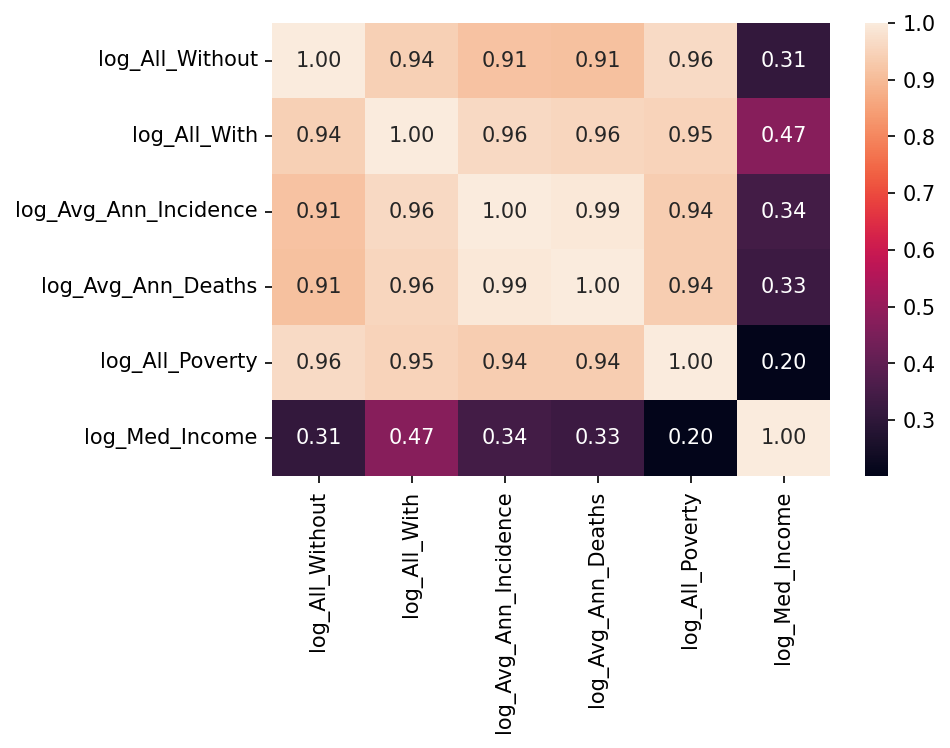

In [44]:
corr = df7.corr()
plt.figure(dpi=150)
sns.heatmap(df7.corr(), annot=True, fmt= '.2f')
plt.show()


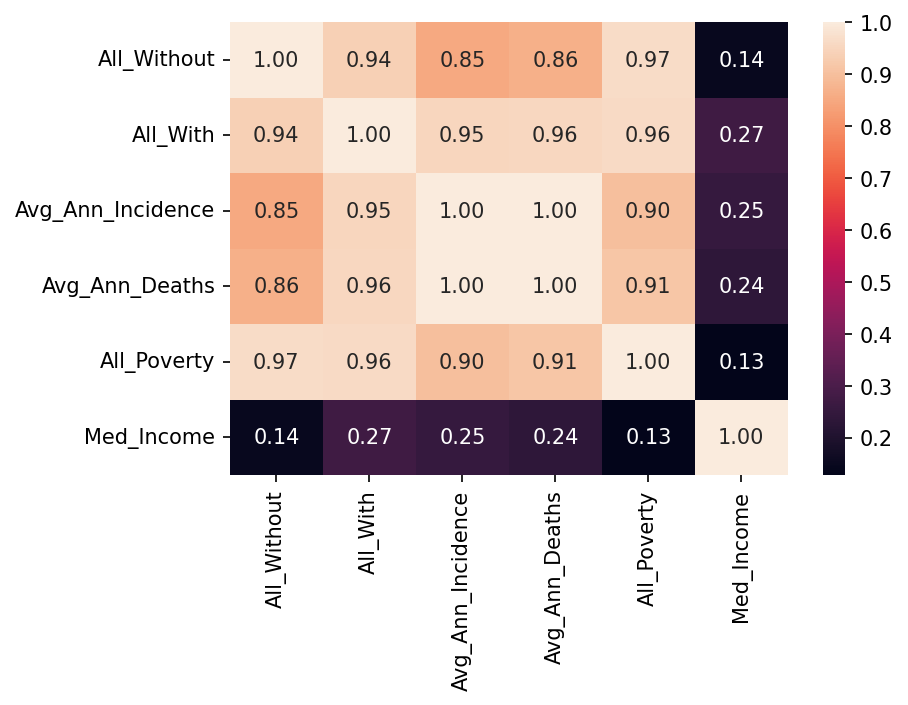

In [45]:
corr = df8.corr()
plt.figure(dpi=150)
sns.heatmap(df8.corr(), annot=True, fmt= '.2f')
plt.show()

<Figure size 1080x540 with 0 Axes>

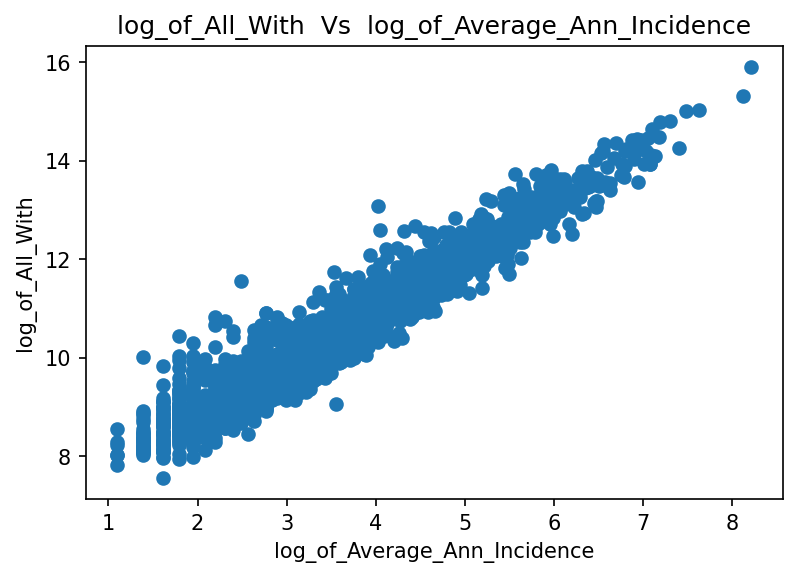

In [46]:
plt.figure(figsize=(15, 7.5))
plt.figure(dpi=150)
plt.scatter(df3, df4, alpha=1) 
plt.title(f"{'log_of_All_With'}  Vs  {'log_of_Average_Ann_Incidence'}")
plt.xlabel('log_of_Average_Ann_Incidence')
plt.ylabel('log_of_All_With')
plt.show()

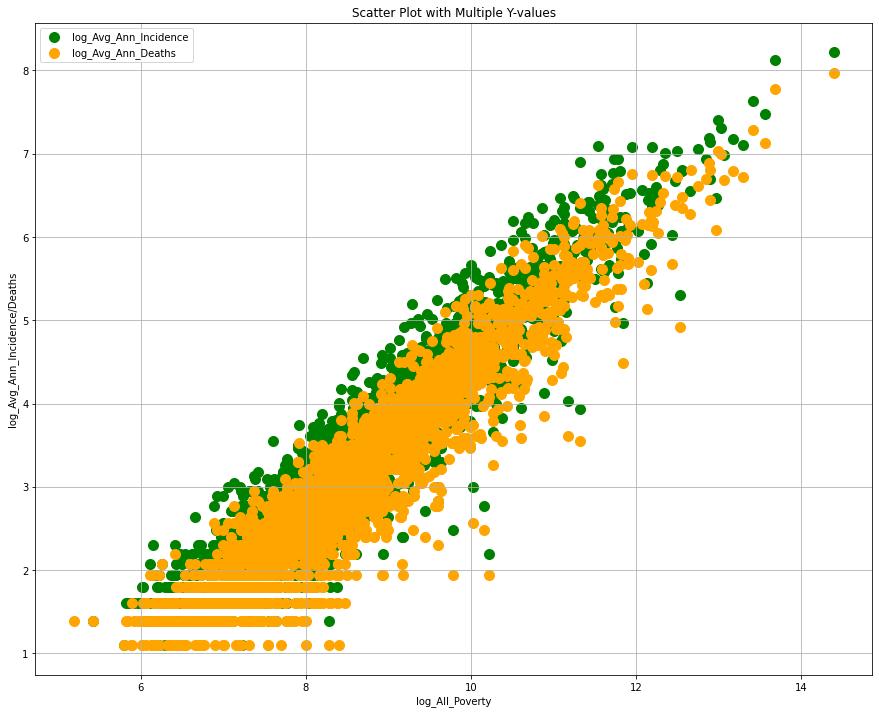

In [47]:
csvFile = pd.read_csv('sendthis.csv')
x = csvFile['log_All_Poverty']
y1 = csvFile['log_Avg_Ann_Incidence'] 
y2 = csvFile['log_Avg_Ann_Deaths']  

plt.figure(figsize=(15, 12)) 
plt.scatter(x, y1, label='log_Avg_Ann_Incidence', color='green', marker='o',s=100) 
plt.scatter(x, y2, label='log_Avg_Ann_Deaths', color='orange', marker='o',s=100)   


plt.xlabel('log_All_Poverty')
plt.ylabel('log_Avg_Ann_Incidence/Deaths')
plt.legend()


plt.title('Scatter Plot with Multiple Y-values')

plt.grid(True)


C:\Users\Pankaj\AppData\Local\Temp\ipykernel_17092\781118618.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df7['log_Avg_Ann_Incidence']),bins=50,color='r',ax=ax)


<AxesSubplot: xlabel='log_Avg_Ann_Incidence', ylabel='Density'>

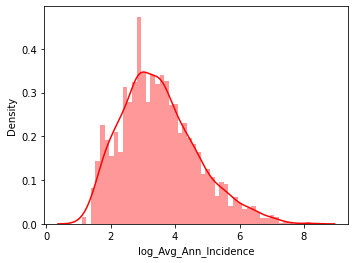

<Figure size 900x600 with 0 Axes>

In [48]:
f= plt.figure(figsize=(12,4))
plt.figure(dpi=150)
ax=f.add_subplot(121)
sns.distplot((df7['log_Avg_Ann_Incidence']),bins=50,color='r',ax=ax)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [50]:
selected_columns = ['log_All_Poverty', 'log_Med_Income', 'log_All_With', 'log_All_Without']
X1 = df7[selected_columns]
y1 = df7['log_Avg_Ann_Incidence']

In [51]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2)
reg=LinearRegression()
reg.fit(X1_train,y1_train)

LinearRegression()

Text(0, 0.5, 'Predicted Value')

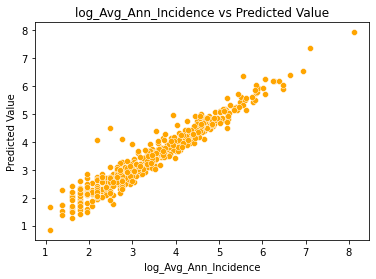

In [52]:
y1_pred = reg.predict(X1_test)
sns.scatterplot(x = y1_test, y = y1_pred,c='orange')
plt.title(f"{'log_Avg_Ann_Incidence'} vs {'Predicted Value'}")
plt.xlabel('log_Avg_Ann_Incidence')
plt.ylabel('Predicted Value')


In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R squared error', r2_score(y1_test,y1_pred))

MAE 0.2152174058966634
MSE 0.08895503961860467
RMSE 0.2982533145140296
R squared error 0.9314013965692912


In [54]:
selected_columns = ['log_All_Poverty', 'log_Med_Income', 'log_All_With', 'log_All_Without']
X2 = df7[selected_columns]
y2 = df7['log_Avg_Ann_Deaths']

In [55]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

<AxesSubplot: title={'center': 'log_Avg_Ann_Deaths vs Predicted Value'}, xlabel='log_Avg_Ann_Deaths', ylabel='Predicted Value'>

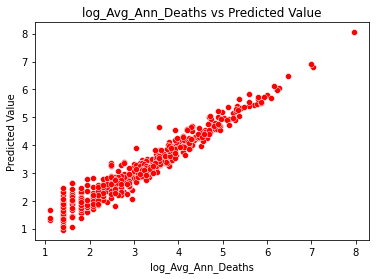

In [56]:
reg=LinearRegression()
reg.fit(X2_train,y2_train)
y2_pred = reg.predict(X2_test)
plt.title(f"{'log_Avg_Ann_Deaths'} vs {'Predicted Value'}")
plt.xlabel('log_Avg_Ann_Deaths')
plt.ylabel('Predicted Value')
sns.scatterplot(x = y2_test, y = y2_pred,color='red')

In [57]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R squared error', r2_score(y2_test,y2_pred))

MAE 0.2172424730357298
MSE 0.08114358510203913
RMSE 0.28485713103596183
R squared error 0.9375429761145446
